# Question 1

## Introduction:

### Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
### Occupations

In [147]:
#Step 1. Import the necessary libraries
import pandas as pd


In [148]:
#Step 2. Import the dataset from this address. & Step 3. Assign it to a variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [149]:
# Step 4. Discover what is the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean age per occupation:")
print(mean_age_per_occupation)
print()


Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64



In [150]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').mean() * 100).sort_values(ascending=False)
print("Male ratio per occupation (from most to least):")
print(male_ratio_per_occupation)
print()


Male ratio per occupation (from most to least):
occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64



In [151]:
# Step 6. For each occupation, calculate the minimum and maximum ages
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("Minimum and maximum ages for each occupation:")
print(min_max_age_per_occupation)



Minimum and maximum ages for each occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [152]:
# Step-7:
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("Mean age per occupation and sex:")
print(mean_age_per_occupation_sex)
print()

Mean age per occupation and sex:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986


In [39]:
# Step 8. For each occupation present the percentage of women and men
total_gender_per_occupation = users.groupby('occupation')['gender'].value_counts()
total_occupation = users['occupation'].value_counts()

gender_percentage_per_occupation = (total_gender_per_occupation / total_occupation) * 100
print("Percentage of women and men per occupation:")
print(gender_percentage_per_occupation)

Percentage of women and men per occupation:
occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.71428

# Question 2
## Euro Teams


In [15]:
# Step 2. Import the dataset from this address & # Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [16]:
# Step 4. Select only the Goal column
goals_column = euro12['Goals']
print(goals_column)


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [17]:
# Step 5. How many teams participated in the Euro2012?
num_teams = euro12['Team'].nunique()
print("Number of teams participated in Euro2012:", num_teams)


Number of teams participated in Euro2012: 16


In [18]:
# Step 6. What is the number of columns in the dataset?
num_columns = len(euro12.columns)
print("Number of columns in the dataset:", num_columns)


Number of columns in the dataset: 35


In [19]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [20]:
# Step 8. Sort the teams by Red Cards, then by Yellow Cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [21]:
# Step 9. Calculate the mean Yellow Cards given per Team individually
mean_yellow_cards_per_team = discipline.groupby('Team')['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:")
print(mean_yellow_cards_per_team)


Mean Yellow Cards given per Team:
Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [24]:
# Step 10. Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [25]:
# Step 11. Select the teams that start with G
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [26]:
# Step 12. Select the first 7 columns
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [27]:
# Step 13. Select all columns except the last 3
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [28]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
## Housing

In [32]:
# Step 1. Import the necessary libraries
import numpy as np

In [33]:
# Step 2. Create 3 differents Series, each of length 100
series_1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series_2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series_3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

In [36]:
series_1
series_2
series_3

0     29650
1     17434
2     27613
3     14294
4     29732
      ...  
95    22544
96    25320
97    21653
98    23058
99    12566
Length: 100, dtype: int32

In [39]:
# Step 3. Create a DataFrame by joinning the Series by column
housing = pd.concat([series_1, series_2, series_3], axis = 1)
housing

,0,1,2
0,3,3,29650
1,3,2,17434
2,4,3,27613
3,2,3,14294
4,3,2,29732
...,...,...,...
95,4,1,22544
96,3,1,25320
97,1,3,21653
98,4,1,23058


In [40]:
# Step 4. Change the name of the columns to 'bedrs', 'bathrs', 'price_sqr_meter'
housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housing

,bedrs,bathrs,price_sqr_meter
0,3,3,29650
1,3,2,17434
2,4,3,27613
3,2,3,14294
4,3,2,29732
...,...,...,...
95,4,1,22544
96,3,1,25320
97,1,3,21653
98,4,1,23058


In [42]:
# Step-5 Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series_1, series_2, series_3], axis=0)
bigcolumn = bigcolumn.to_frame()
bigcolumn

,0
0,3
1,3
2,4
3,2
4,3
...,...
95,22544
96,25320
97,21653
98,23058


In [43]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
bigcolumn.count()

0    300
dtype: int64

In [44]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,3
2,4
3,2
4,3
...,...
295,22544
296,25320
297,21653
298,23058


#  Question 4
## Wind Statistics
### The data have been modified to contain some missing values, identified by NaN.

In [154]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [155]:
# Step 2. Import the dataset from the attached file wind.txt
data = pd.read_csv("wind.txt",sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [156]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv("wind.txt", delim_whitespace=True)
data["Date"] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1), format='%y-%m-%d')
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)
data = data[['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [157]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix_years(date):
    # If the year is greater than the current year, subtract 100 years
    if date.year > pd.Timestamp.now().year:
        date = date.replace(year=date.year - 100)
    return date

In [52]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [53]:
 # Step 6. Compute how many values are missing for each location over the entire record.
# They should be ignored in all calculations below.
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [54]:
# Step 7. Compute how many non-missing values there are in total.
data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [55]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
average_windspeeds = data.mean().mean()
print("Average windspeeds: ", round(average_windspeeds, 2))

Average windspeeds:  10.23


In [56]:
#  Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations
# of the windspeeds at each location over all the days
loc_stats = data.describe().loc[['mean','std','min','max'], :]
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [57]:
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
#  windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = pd.DataFrame()
day_stats['min'] = round(data.min(axis=1),2)
day_stats['max'] = round(data.max(axis=1),2)
day_stats['mean'] = round(data.mean(axis=1),2)
day_stats['std'] = round(data.std(axis=1),2)
day_stats

,min,max,mean,std
Date,,,,
2061-01-01,9.29,18.50,13.02,2.81
2061-01-02,6.50,17.54,11.34,3.19
2061-01-03,6.17,18.50,11.64,3.68
2061-01-04,1.79,11.75,6.62,3.20
2061-01-05,6.17,13.33,10.63,2.45
...,...,...,...,...
1978-12-27,8.08,40.08,16.71,7.87
1978-12-28,5.00,41.46,15.15,9.69
1978-12-29,8.71,29.58,14.89,5.76


In [58]:
# Step 11. Find the average windspeed in January for each location
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [59]:
# Step 12. Downsample the record to a yearly frequency for each location
data.groupby(data.index.to_period('Y')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1970,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027
1971,11.273123,9.095178,11.088329,5.241507,9.440329,6.097151,8.385890,6.757315,7.915370,7.229753,12.208932,15.025233
1972,12.463962,10.561311,12.058333,5.929699,9.430410,6.358825,9.704508,7.680792,8.357295,7.515273,12.727377,15.028716
1973,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1974,13.643096,11.811781,12.336356,6.427041,11.110986,6.809781,10.084603,9.896986,9.331753,8.736356,13.252959,16.947671
1975,12.008575,10.293836,11.564712,5.269096,9.190082,5.668521,8.562603,7.843836,8.797945,7.382822,12.631671,15.307863
1976,11.737842,10.203115,10.761230,5.109426,8.846339,6.311038,9.149126,7.146202,8.883716,7.883087,12.332377,15.471448
1977,13.099616,11.144493,12.627836,6.073945,10.003836,8.586438,11.523205,8.378384,9.098192,8.821616,13.459068,16.590849


In [60]:
# Step 13. Downsample the record to a monthly frequency for each location.
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1969-01,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742
1969-02,13.504643,10.426786,14.240714,7.326786,11.314643,5.482857,10.983929,8.747143,8.994286,9.081071,14.334643,19.786786
1969-03,10.398710,8.533226,12.277419,6.125161,9.618065,4.942581,9.193226,8.503226,8.376129,7.800968,10.394194,16.420000
1969-04,12.591333,9.769333,10.828000,6.937333,11.304667,5.578000,9.383333,8.141667,9.201333,8.370333,11.905667,14.124000
1969-05,9.419032,7.941935,9.298387,5.137097,8.618710,5.391935,6.309032,5.752581,5.907419,6.317419,9.332258,11.794839
...,...,...,...,...,...,...,...,...,...,...,...,...
2068-08,9.231935,6.870323,13.075161,6.074839,8.954516,4.835484,6.752903,6.429677,5.882258,4.733548,10.793226,9.819032
2068-09,12.137000,11.160667,12.008000,6.886000,11.718667,6.497333,9.476000,8.504000,7.781333,7.584000,12.900333,13.583667
2068-10,12.521290,11.755484,11.235161,6.433871,11.381935,6.554516,8.357742,9.450645,8.102258,8.370968,14.871935,16.388065


In [61]:
# Step 14. Downsample the record to a weekly frequency for each location.
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1968-12-30/1969-01-05,5.884000,3.958000,6.758000,2.752000,5.416000,2.392000,8.626000,4.388000,5.640000,7.160000,11.510000,16.108000
1969-01-06/1969-01-12,14.708571,12.521429,15.135714,6.851429,11.940000,6.744286,10.591429,9.174286,9.107143,10.124286,12.130000,20.385714
1969-01-13/1969-01-19,15.030000,16.452857,10.778571,7.774286,12.590000,6.821429,9.998571,8.815714,9.078571,8.385714,13.624286,14.248571
1969-01-20/1969-01-26,14.438571,14.267143,13.017143,7.721429,10.607143,7.114286,8.537143,10.030000,7.720000,10.720000,15.475714,15.827143
1969-01-27/1969-02-02,13.510000,11.917143,10.702857,8.111429,11.581429,5.612857,12.305714,8.394286,10.437143,10.771429,15.757143,20.284286
...,...,...,...,...,...,...,...,...,...,...,...,...
2068-12-03/2068-12-09,9.251429,10.535714,12.772857,5.142857,8.684286,4.720000,7.632857,6.535714,6.081429,8.310000,10.855714,15.102857
2068-12-10/2068-12-16,12.047143,10.464286,10.857143,4.685714,8.707143,4.780000,6.470000,6.095714,6.302857,7.690000,10.970000,14.588571
2068-12-17/2068-12-23,18.220000,15.165714,15.737143,9.208571,13.352857,8.395714,13.701429,10.178571,11.177143,12.630000,15.750000,22.332857


In [63]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
# windspeeds across all locations for each week (assume that the first week starts on 
# January 2 1961) for the first 52 weeks
week = data.resample('W').agg(['min','max','mean','std'])
week.loc[week.index[1:53]]

RPT                               VAL                    \
              min    max       mean       std   min    max       mean   
Date                                                                    
1969-01-12   9.33  22.34  14.708571  5.473684  3.29  18.50  12.521429   
1969-01-19   4.50  25.08  15.030000  6.915213  1.50  25.17  16.452857   
1969-01-26   4.00  20.54  14.438571  5.990624  5.13  20.25  14.267143   
1969-02-02   5.21  18.58  13.510000  5.100791  3.96  19.79  11.917143   
1969-02-09   5.17  21.50  12.698571  6.207413  1.96  19.00   9.387143   
1969-02-16  12.71  24.75  15.875714  4.448055  5.00  15.34   9.644286   
1969-02-23   8.04  27.79  15.790000  6.449098  4.25  23.58  14.047143   
1969-03-02   0.67  10.75   7.142857  3.720774  3.58  10.83   6.320000   
1969-03-09   2.29  16.46   8.975714  5.089679  3.04  10.41   6.747143   
1969-03-16   6.00  21.12  11.850000  5.362879  2.92  17.62   9.612857   
1969-03-23   2.92  21.46  11.500000  6.539829  4.50  16.38  10.791429   
1969-03-30   3.58  12.87   7.951429  3.137406  2.83  13.50   6.257143   
1969-04-06   4.17  22.34  11.524286  6.956642  2.88  16.46   6.422857   
1969-04-13   6.50  24.75  14.590000  7.115326  1.63  20.75  10.910000   
1969-04-20   7.41  18.16  12.465714  4.599206  5.83  15.59  10.924286   
1969-04-27   9.79  21.00  14.670000  4.417616  8.21  16.71  12.970000   
1969-05-04   4.58  16.75   8.450000  4.671274  2.96  13.62   5.535714   
1969-05-11   4.08  14.29   8.137143  4.009047  4.46  13.88   8.422857   
1969-05-18   6.34  15.09  10.175714  3.310674  5.71  12.75   9.704286   
1969-05-25   3.54  15.79   9.642857  4.372938  5.13  10.96   7.375714   
1969-06-01   4.46  13.70   9.848571  3.641568  5.13  12.96   7.858571   
1969-06-08   2.17  14.17   7.095714  4.717736  3.46  12.71   5.811429   
1969-06-15   4.42  15.34   9.412857  3.957932  2.88  15.71   6.725714   
1969-06-22   9.17  21.96  14.685714  4.425708  8.50  16.83  13.945714   
1969-06-29   3.46  12.62   7.475714  3.175221  4.38  13.79   7.528571   
1969-07-06   5.54  13.25   8.160000  2.739428  4.42   9.83   7.441429   
1969-07-13   4.04  17.88   9.144286  4.615575  3.46  10.25   5.755714   
1969-07-20   3.88  18.84  10.657143  4.523884  5.83  18.54  10.520000   
1969-07-27   4.50  12.83   8.280000  3.304653  5.25  15.67   9.445714   
1969-08-03   9.96  14.37  11.724286  1.836327  6.50  17.79  11.374286   
1969-08-10   4.54  14.37  10.171429  3.207748  8.96  17.62  13.512857   
1969-08-17   3.67  14.92   8.507143  3.774201  2.79  10.13   5.924286   
1969-08-24   8.38  16.79  13.620000  3.626950  8.46  14.92  10.655714   
1969-08-31   4.17  20.08  13.922857  6.671601  4.88  12.83   8.678571   
1969-09-07   1.50   8.04   4.648571  2.170357  1.00   8.08   3.571429   
1969-09-14   4.25  16.50   9.082857  4.516096  3.04  15.63   6.851429   
1969-09-21   3.83  18.54   9.147143  4.734447  0.87  16.62   7.114286   
1969-09-28   7.41  16.17  11.907143  3.515521  6.29  15.75  11.612857   
1969-10-05   4.00  15.09   9.511429  3.661072  2.37  15.16   8.488571   
1969-10-12   4.67  20.08  12.654286  5.319360  3.17  21.59  13.798571   
1969-10-19   5.37  24.46  14.501429  6.239731  1.21  23.58  12.707143   
1969-10-26   2.42  13.29   7.321429  4.173166  1.67  18.00   7.917143   
1969-11-02   4.29  24.04   9.921429  6.591255  3.88  24.87   9.597143   
1969-11-09   5.50  22.63  15.610000  5.885131  6.17  27.33  14.947143   
1969-11-16   4.79  19.87  10.452857  4.712203  3.29  20.71   9.434286   
1969-11-23   3.46  20.04  10.791429  4.928027  2.75  19.46  11.584286   
1969-11-30   6.54  15.21  11.601429  3.358434  3.54  11.63   8.154286   
1969-12-07   9.46  23.04  14.934286  5.201519  7.87  16.96  13.237143   
1969-12-14   3.46  22.67  11.642857  7.012902  3.37  22.54  10.227143   
1969-12-21   6.17  24.41  12.938571  6.204497  4.46  20.41  12.470000   
1969-12-28   6.71  18.34  12.495714  4.208618  5.75  18.00  10.922857   
1970-01-04   8.08  18.66  12.458571  4.033218  2.96  15.96   9.304286   

# Question 5

In [66]:
# Step 2. Import the dataset from the provided address: & # Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [67]:
# Step 4. See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [68]:
# Step 5. What is the number of observations in the dataset?
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [71]:
# Step 6. What is the number of columns in the dataset?
chipo.shape[1]


5

In [75]:
# Step 7. Print the name of all the columns.
chipo.columns.values

array(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'], dtype=object)

In [76]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [77]:
# Step 9. Which was the most-ordered item?
chipo.groupby(['item_name'])['quantity'].sum().idxmax()

'Chicken Bowl'

In [72]:
# Step 10. For the most-ordered item, how many items were ordered?
chipo.groupby(['item_name'])['quantity'].sum().max()

761

In [73]:
# Step 11. What was the most ordered item in the choice_description column?
chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False).head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


In [74]:
# Step 12. How many items were orderd in total
chipo['quantity'].sum()

4972

In [78]:
# Step 13.
# • Turn the item price into a float
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [82]:
# Step 13.
# • Check the item price type
chipo['item_price'].dtype

dtype('float64')

In [83]:
# Step 13. 
# • Create a lambda function and change the type of item price
if chipo['item_price'].dtype == 'object':
    chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print("Data type of 'item_price':", chipo['item_price'].dtype)

Data type of 'item_price': float64


In [84]:
#  Step 13.
# • Check the item price type
chipo['item_price'].dtype

dtype('float64')

In [86]:
# Step 14. How much was the revenue for the period in the dataset?
chipo['revenue'] = chipo['quantity']*chipo['item_price']
chipo['revenue'].sum()

39237.02

In [87]:
# Step 15. How many orders were made in the period?
chipo['order_id'].value_counts().count()

1834

In [88]:
# Step 16. What is the average revenue amount per order?
average_revenue_per_order = chipo.groupby('order_id')['revenue'].sum().mean()

# Print the result
print("Average revenue per order: ", average_revenue_per_order)

Average revenue per order:  21.39423118865867


In [85]:
# Step 17. How many different items are sold
chipo['item_name'].nunique()

50

# Question 6
### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Include the following:

>Label both lines

>Show the legend

>Label your axes

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


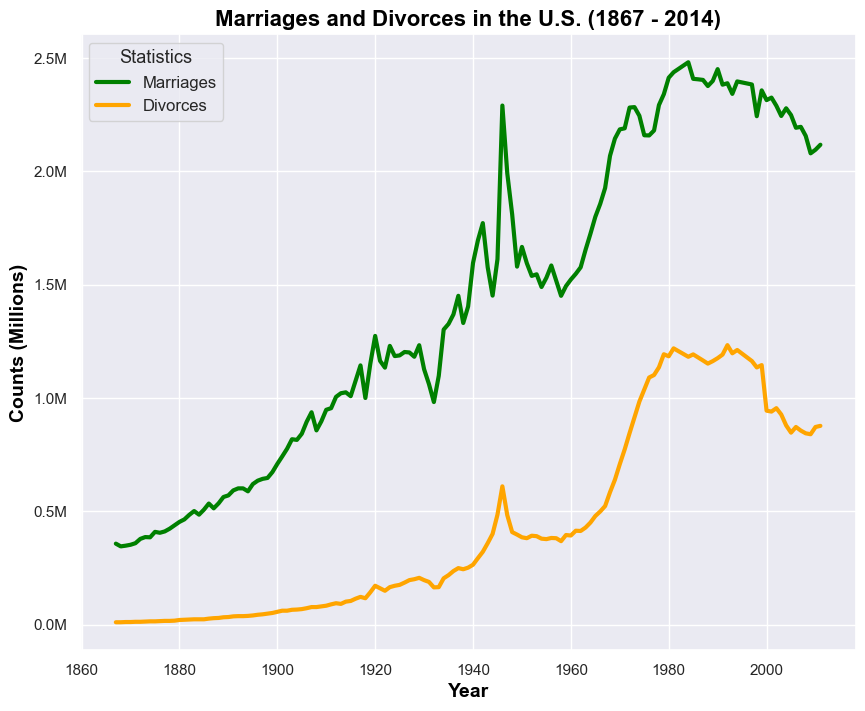

In [101]:
# Set seaborn style and figure size
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(10, 8)})

# Create line plot
chart = sns.lineplot(x="Year", y='Marriages', data=data, label='Marriages', color='green', linewidth=3)
chart = sns.lineplot(x="Year", y='Divorces', data=data, label='Divorces', color='orange', linewidth=3)

# Set plot title and axis labels with changed text color to green
chart.set_title('Marriages and Divorces in the U.S. (1867 - 2014)', fontsize=16, weight='bold', color='black')
chart.set_xlabel('Year', fontsize=14, weight='bold', color='black')
chart.set_ylabel('Counts (Millions)', fontsize=14, weight='bold', color='black')

# Add legend with title
plt.legend(title='Statistics', title_fontsize='13', fontsize='12')

# Format y-axis labels to display in millions
formatter = FuncFormatter(lambda y, _: f'{y / 10**6:.1f}M')
chart.yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()


#  Question 7
### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Remember to:

- Label your axes

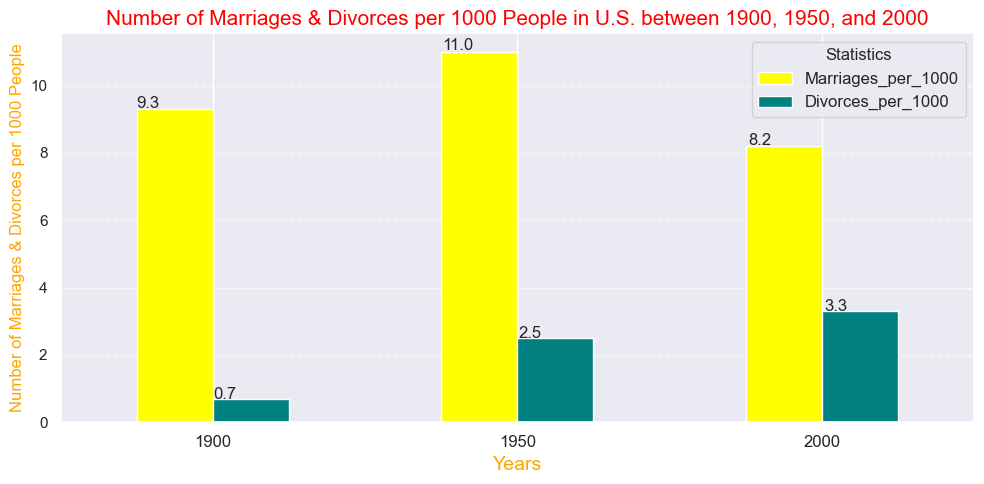

In [159]:
#Generating bar chart
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

comparison = data[data['Year'].isin([1900, 1950, 2000])]

comparison_1 = comparison.set_index('Year')[['Marriages_per_1000', 'Divorces_per_1000']]

ax = comparison_1.plot.bar(figsize=(10, 5), color=['yellow', 'teal'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('Years', fontsize=14,color='orange' )
plt.ylabel('Number of Marriages & Divorces per 1000 People',color='orange',fontsize=12)
plt.title("Number of Marriages & Divorces per 1000 People in U.S. between 1900, 1950, and 2000", color='red',fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Statistics', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. 
Sort the actors by their kill count and label each bar with the corresponding actor's name. 
Remember to:
- Label your axes


In [143]:
#Importing data from the CSV file
data = pd.read_csv("actor_kill_counts.csv")
data = data.sort_values(['Count']).reset_index(drop=True)
data


,Actor,Count
0,Wesley Snipes,193
1,Clive Owen,194
2,Jet Li,201
3,Nicolas Cage,204
4,Clint Eastwood,207
5,Tomisaburo Wakayama,226
6,Dolph Lundgren,239
7,Sylvester Stallone,267
8,Chow Yun-Fat,295
9,Arnold Schwarzenegger,369


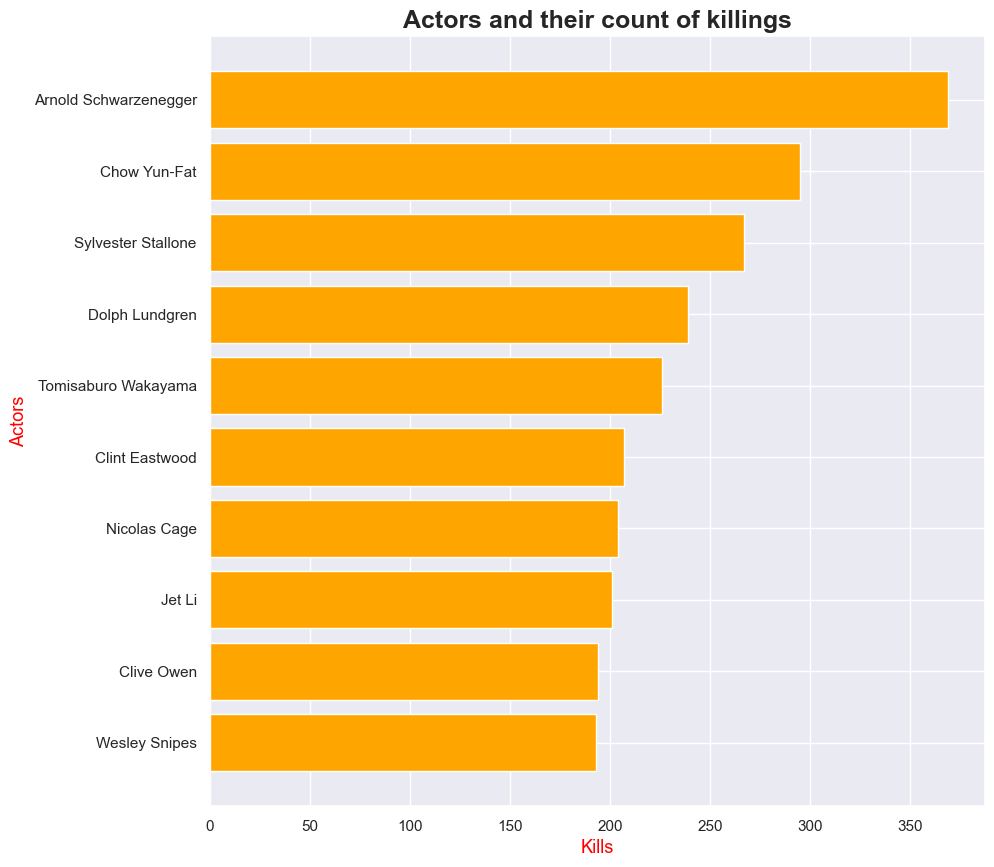

In [146]:
#Generating chart according to instructions
fig,chart = plt.subplots()
chart.barh(data["Actor"], data["Count"], align='center',color='orange')
chart.set_title('Actors and their count of killings',weight='bold',fontsize=18)
chart.set_xlabel('Kills',color='red',fontsize=13)
chart.set_ylabel('Actors',color='red',fontsize=13)
fig.set_size_inches(10, 10)
plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure to:
- Ensure the pie chart is an even circle
- Label the categories
- Show the percentage breakdown of the categories

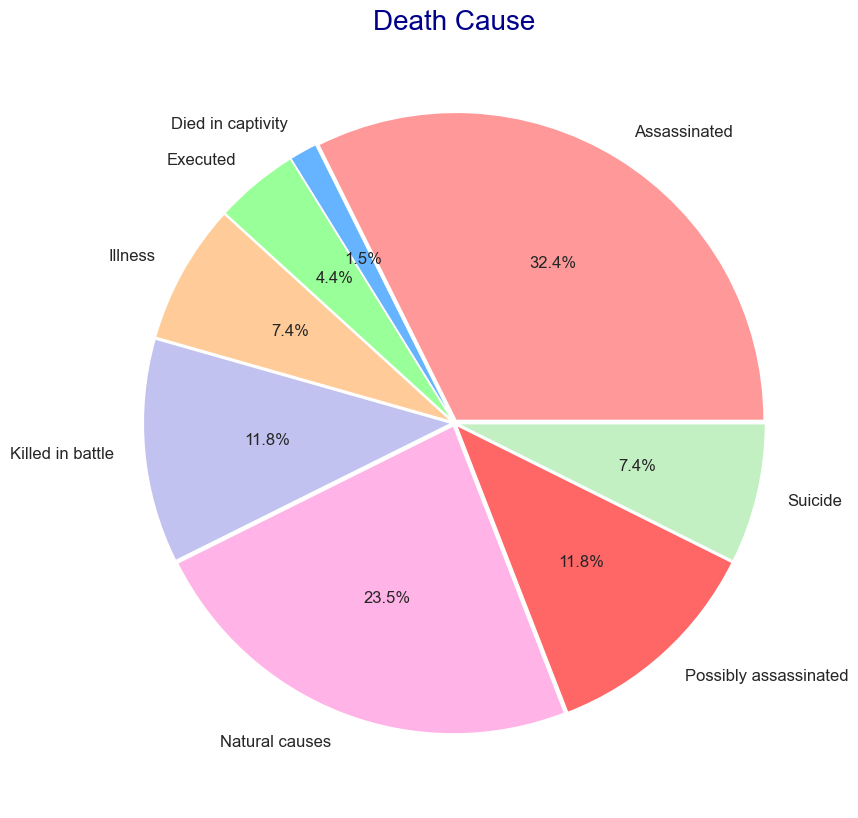

In [132]:
# Using the data from CSV file
data = pd.read_csv('roman-emperor-reigns.csv')

# Generating Pie chart as per instructions
sns.set()
data = data.groupby("Cause_of_Death")['Emperor'].count()

# Define your custom colors
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#c2f0c2']

data.plot.pie(autopct="%.1f%%", figsize=(10, 10), fontsize=12, ylabel='', explode=[0.01]*8, colors=custom_colors)
plt.title("Death Cause",color='darkblue', fontsize=20)
plt.show()

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Include the following:
- Label your axes
- Color each dot according to its year

In [125]:
#Using the data from CSV file
import matplotlib.pyplot as plt
student_data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
student_data

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


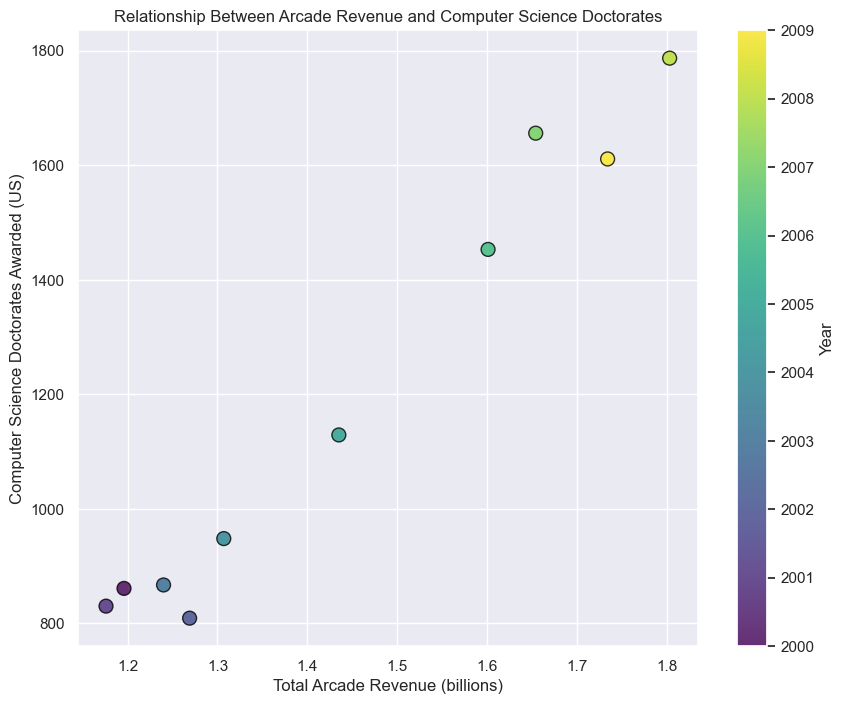

In [135]:

# Assuming student_data is your DataFrame
years = student_data['Year']
revenue = student_data['Total Arcade Revenue (billions)']
doctorates_awarded = student_data['Computer Science Doctorates Awarded (US)']

# Create a scatter plot with color mapping
scatter = plt.scatter(revenue, doctorates_awarded, c=years, cmap='viridis', edgecolors='black', s=100, alpha=0.8)

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship Between Arcade Revenue and Computer Science Doctorates')

# Adding colorbar to indicate years
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Showing the plot
plt.show()